Nama: Fera Annisa
NPM: 2213020112
Kelas: 3A

Import Library

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Membaca dan menampilkan ukuran data dari file

In [9]:
img = cv2.imread('bunga matahari.jpg')
print(f"Tipe data gambar: {img.dtype}, ukuran: {img.shape}")

Tipe data gambar: uint8, ukuran: (981, 736, 3)


Konversi BGR ke RGB untuk visualisasi (karena OpenCV default BGR)

In [10]:
img_rgb = img[:, :, ::-1]

Cek ukuran resolusi

In [11]:
height, width, channels = img.shape
print(f"Resolusi gambar: {width} x {height}")

Resolusi gambar: 736 x 981


Proses Konversi grayscale dengan perulangan imperatif dg hitung tiap piksel

In [12]:
print("\nKonversi ke Grayscale")
grayscale = [[0 for _ in range(width)] for _ in range(height)]
KR, KG, KB = 0.299, 0.587, 0.114
for y in range(height):
    for x in range(width):
        b = img[y, x, 0] / 255.0
        g = img[y, x, 1] / 255.0
        r = img[y, x, 2] / 255.0
        gray = KR * r + KG * g + KB * b
        grayscale[y][x] = gray
        if y % 100 == 0 and x % 100 == 0:
            print(f'Pixel[{y},{x}] -> R: {r:.3f}, G: {g:.3f}, B: {b:.3f}, Gray: {gray:.3f}')
print("Selesai.")


Konversi ke Grayscale


Pixel[0,0] -> R: 0.286, G: 0.384, B: 0.310, Gray: 0.347
Pixel[0,100] -> R: 0.345, G: 0.435, B: 0.153, Gray: 0.376
Pixel[0,200] -> R: 0.188, G: 0.259, B: 0.063, Gray: 0.215
Pixel[0,300] -> R: 0.278, G: 0.349, B: 0.161, Gray: 0.306
Pixel[0,400] -> R: 0.400, G: 0.471, B: 0.141, Gray: 0.412
Pixel[0,500] -> R: 0.502, G: 0.569, B: 0.153, Gray: 0.501
Pixel[0,600] -> R: 0.157, G: 0.247, B: 0.075, Gray: 0.200
Pixel[0,700] -> R: 0.588, G: 0.624, B: 0.416, Gray: 0.589
Pixel[100,0] -> R: 0.380, G: 0.427, B: 0.341, Gray: 0.404
Pixel[100,100] -> R: 0.259, G: 0.329, B: 0.235, Gray: 0.298
Pixel[100,200] -> R: 0.165, G: 0.220, B: 0.090, Gray: 0.188
Pixel[100,300] -> R: 0.925, G: 0.863, B: 0.243, Gray: 0.811
Pixel[100,400] -> R: 0.776, G: 0.686, B: 0.075, Gray: 0.644
Pixel[100,500] -> R: 0.400, G: 0.439, B: 0.192, Gray: 0.399
Pixel[100,600] -> R: 0.455, G: 0.529, B: 0.212, Gray: 0.471
Pixel[100,700] -> R: 0.518, G: 0.557, B: 0.271, Gray: 0.513
Pixel[200,0] -> R: 0.200, G: 0.247, B: 0.106, Gray: 0.217
Pi

Visualisasi


Menampilkan gambar sebelum di konversi grayscale


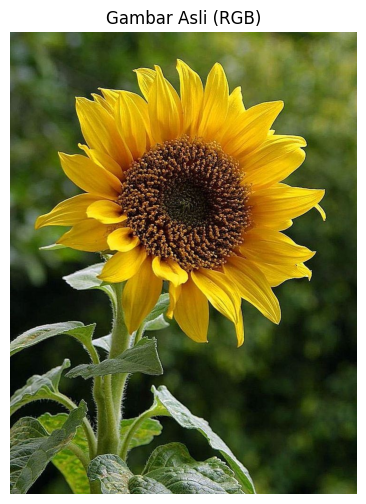

In [13]:
print("\nMenampilkan gambar sebelum di konversi grayscale")
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title('Gambar Asli (RGB)')
plt.axis('off')  
plt.show()



Menampilkan hasil setelah di konversi ke grayscale


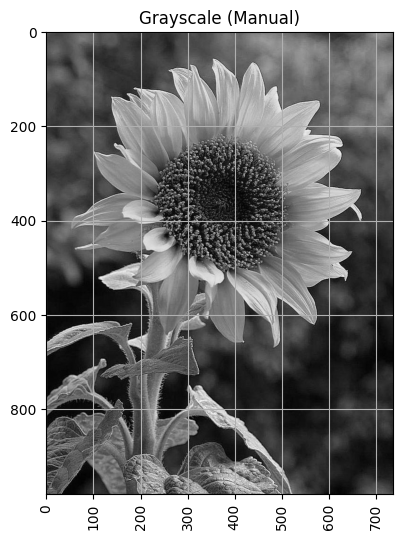

In [27]:
print("\nMenampilkan hasil setelah di konversi ke grayscale")

plt.figure(figsize=(6, 6))
plt.imshow(grayscale, cmap='gray')
plt.title('Grayscale (Manual)')
plt.axis('on')            
plt.grid(True)           
plt.xticks(rotation=90)   
plt.yticks()
plt.show()

# Operator Prewitt

Kernel prewitt

In [31]:
padded = np.pad(grayscale, ((1, 1), (1, 1)), mode='constant', constant_values=0)
kernel_x = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])

kernel_y = np.array([[1, 1, 1],
                     [0, 0, 0],
                     [-1, -1, -1]])

In [35]:
rows, cols = gray.shape
gx_image = np.zeros((rows, cols), dtype=np.float32)
gy_image = np.zeros((rows, cols), dtype=np.float32)
prewitt_output = np.zeros((rows, cols), dtype=np.uint8)

Array hasil

In [36]:
prewitt_output

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(981, 736), dtype=uint8)

Konversi manual

In [37]:
for i in range(1, rows - 1): #kecuali tepi luar agar tidak melebihi batas mengambil jendela 3x3
    for j in range(1, cols - 1):
        region = gray[i-1:i+2, j-1:j+2]

        gx = np.sum(kernel_x * region) #vertikal
        gy = np.sum(kernel_y * region) #horizontal

        # Simpan hasil antara
        gx_image[i, j] = gx
        gy_image[i, j] = gy

        # Hitung gradien gabungan
        grad = np.sqrt(gx**2 + gy**2) #rumus vektor pythagoras

        # Simpan ke output
        prewitt_output[i, j] = np.clip(grad, 0, 255)

In [38]:
prewitt_output

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   9,   8, ...,  19,  43,   0],
       [  0,   7,   5, ...,  13,  36,   0],
       ...,
       [  0, 104,  60, ...,  15,  15,   0],
       [  0,  10, 117, ...,  27,  28,   0],
       [  0,   0,   0, ...,   0,   0,   0]], shape=(981, 736), dtype=uint8)

In [42]:
gx_vis = np.clip((gx_image - np.min(gx_image)) / np.ptp(gx_image) * 255, 0, 255).astype(np.uint8)
gy_vis = np.clip((gy_image - np.min(gy_image)) / np.ptp(gy_image) * 255, 0, 255).astype(np.uint8)

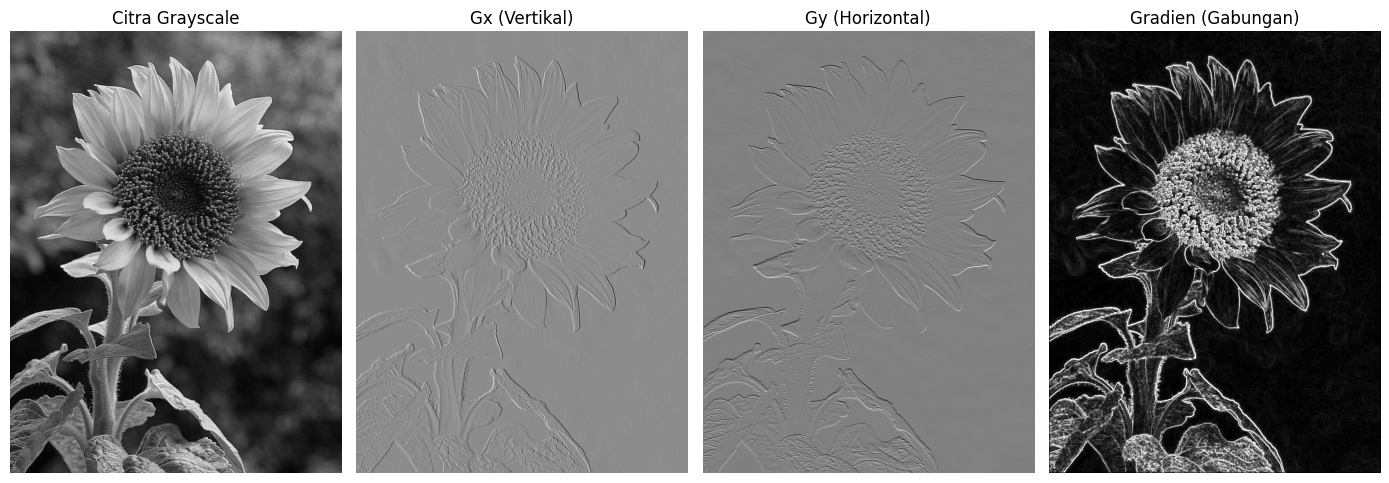

In [43]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 4, 1)
plt.title("Citra Grayscale")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Gx (Vertikal)")
plt.imshow(gx_vis, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Gy (Horizontal)")
plt.imshow(gy_vis, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Gradien (Gabungan)")
plt.imshow(prewitt_output, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Operator Roberts

Kernel Roberts

In [45]:
kernel_roberts_x = np.array([[1, 0],
                             [0, -1]])
kernel_roberts_y = np.array([[0, 1],
                             [-1, 0]])

Inisialisasi deteksi tepi

In [56]:
edge_roberts = np.zeros((height - 1, width - 1), dtype=np.uint8)

In [57]:
edge_roberts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(980, 735), dtype=uint8)

Konversi manual

In [58]:
for y in range(height - 1):
    for x in range(width - 1):
        # Ambil 2x2 patch dari gambar grayscale
        patch = gray[y:y+2, x:x+2].astype(int)

        gx = np.sum(kernel_roberts_x * patch)
        gy = np.sum(kernel_roberts_y * patch)

        edge = np.sqrt(gx**2 + gy**2)
        edge_roberts[y, x] = np.clip(edge, 0, 255)

In [59]:
edge_roberts


array([[ 5,  5,  5, ...,  2,  7, 13],
       [ 1,  1,  1, ...,  2,  7, 12],
       [ 2,  1,  1, ...,  1,  5,  9],
       ...,
       [57, 24, 27, ...,  2,  2,  2],
       [45, 22, 39, ...,  4,  4,  5],
       [ 7, 43, 21, ...,  8,  8,  8]], shape=(980, 735), dtype=uint8)

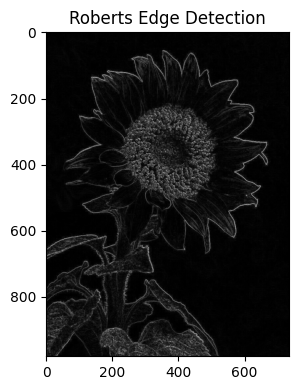

In [62]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 3)
plt.title("Roberts Edge Detection")
plt.imshow(edge_roberts, cmap='gray')

plt.tight_layout()
plt.show()